In [16]:
import numpy
import netCDF4
import matplotlib
import matplotlib.pyplot as mp
import datetime
import scipy
import scipy.ndimage

mp.rcParams.update({'mathtext.default': 'regular'})

import matplotlib.patches
import matplotlib.ticker

import mpl_toolkits.axes_grid1
import cartopy

DEGREE_SIGN = u'\u00B0'

% matplotlib inline

In [17]:
geo_em_ncfile = netCDF4.Dataset('/Users/baird/Dropbox/_data_WRF/geo_em.d01_amazon_50km.nc')
lu_index = geo_em_ncfile.variables['LU_INDEX'][0,:,:]
XLONG_M = geo_em_ncfile.variables['XLONG_M'][0,:,:]
XLAT_M = geo_em_ncfile.variables['XLAT_M'][0,:,:]
HGT_M = geo_em_ncfile.variables['HGT_M'][0,:,:]
LANDMASK = geo_em_ncfile.variables['LANDMASK'][0,:,:]

In [78]:
# make color map
minval=0.0
maxval=0.9
n=256
full_cmap = mp.get_cmap('viridis')
cmap_orog = matplotlib.colors.LinearSegmentedColormap.from_list('trunc({n},{a:.2f},{b:.2f})'.format(n=full_cmap.name, a=minval, b=maxval), full_cmap(numpy.linspace(minval, maxval, n)))


In [79]:
HGT_M_landmask = numpy.copy(HGT_M)
HGT_M_landmask[LANDMASK==0]=numpy.nan

In [80]:
# add right and top info for pcolormesh
HGT_M_expand = numpy.zeros((HGT_M_landmask.shape[0]+1,HGT_M_landmask.shape[1]+1))

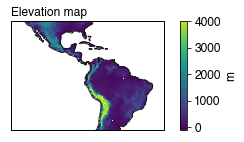

In [83]:
fontsize = 12

fig,ax = mp.subplots(1,1,subplot_kw={'projection':cartopy.crs.PlateCarree()})
fig.set_size_inches(3.25,2)

levels = numpy.arange(-20,21,5)
#ax.gridlines(ylocs=[0], color='0.25')
ax.coastlines(resolution='110m', color='0.1')
ax.set_extent([XLONG_M.min()+23., XLONG_M.max()-2, XLAT_M.min(), XLAT_M.max()], crs=cartopy.crs.PlateCarree())

levels = numpy.arange(0,3001,500)
#contour_orog = ax.contourf(XLONG_M,XLAT_M,HGT_M,levels=levels,cmap=cmap_orog,linewidths=1,extend='max')#,alpha=0.75)
#pcolormesh_orog = ax.pcolormesh(XLONG_M,XLAT_M,HGT_M_expand,vmin=-100,vmax=5000,cmap=cmap_orog)
pcolormesh_orog = ax.pcolor(XLONG_M,XLAT_M,HGT_M_landmask,vmin=-100,vmax=4000,cmap=cmap_orog,snap=True)

bbox_ax = ax.get_position()

ax.text(s='Elevation map', x=0, y=1.02, \
         fontsize=fontsize, ha='left', va='bottom', transform=ax.transAxes)

ax_pos = ax.get_position()
cbar_ax = fig.add_axes([ax_pos.x1+0.01,ax_pos.y0,0.03,ax_pos.height])
cbar = fig.colorbar(pcolormesh_orog, cax=cbar_ax)#, drawedges=True)
#cbar.dividers.set_color('0')
#cbar.dividers.set_linewidth(1)
cbar.set_ticks(numpy.arange(0,4001,1000))
#cbar.set_ticklabels(type_name)
cbar.ax.tick_params(labelsize=fontsize)
cbar.set_label('m', fontsize=fontsize)

fig.savefig('elevation_map.png', bbox_inches='tight', transparent=True, dpi=600)

In [13]:
season='FMAASO'

data_dir = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/METGRID_FILES_RAW_OUTPUT/'+season+'/'
filename00 = data_dir+'met_em.d01.1979-01-01_00:00:00.nc'
filename06 = data_dir+'met_em.d01.1979-01-01_06:00:00.nc'
filename12 = data_dir+'met_em.d01.1979-01-01_12:00:00.nc'
filename18 = data_dir+'met_em.d01.1979-01-01_18:00:00.nc'
ncfile00 = netCDF4.Dataset(filename00, 'r', 'NetCDF4')
ncfile06 = netCDF4.Dataset(filename06, 'r', 'NetCDF4')
ncfile12 = netCDF4.Dataset(filename12, 'r', 'NetCDF4')
ncfile18 = netCDF4.Dataset(filename18, 'r', 'NetCDF4')
ncfile_list = [ncfile00,ncfile06,ncfile12,ncfile18]

XLAT_M = ncfile00.variables['XLAT_M'][0,:,:]
XLONG_M = ncfile00.variables['XLONG_M'][0,:,:]
XLAT_U = ncfile00.variables['XLAT_U'][0,:,:]
XLONG_U = ncfile00.variables['XLONG_U'][0,:,:]
XLAT_V = ncfile00.variables['XLAT_V'][0,:,:]
XLONG_V = ncfile00.variables['XLONG_V'][0,:,:]
LANDMASK = ncfile00.variables['LANDMASK'][0,:,:]

# IMPORT SKINTEMP

In [14]:
skintemp_list = [file.variables['SKINTEMP'][0,:,:]-273.15 for file in ncfile_list]
skintemp_mean = numpy.mean(numpy.array(skintemp_list), axis=0)

# IMPORT UU,VV FOR THIS SEASON

In [15]:
uu850_list = [file.variables['UU'][0,3,:,:] for file in ncfile_list]
uu850_mean_FMAASO = numpy.mean(numpy.array(uu850_list), axis=0)

vv850_list = [file.variables['VV'][0,3,:,:] for file in ncfile_list]
vv850_mean_FMAASO = numpy.mean(numpy.array(vv850_list), axis=0)

# NDJ

In [16]:
season='NDJ'

data_dir = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/METGRID_FILES_RAW_OUTPUT/'+season+'/'
filename00 = data_dir+'met_em.d01.1979-01-01_00:00:00.nc'
filename06 = data_dir+'met_em.d01.1979-01-01_06:00:00.nc'
filename12 = data_dir+'met_em.d01.1979-01-01_12:00:00.nc'
filename18 = data_dir+'met_em.d01.1979-01-01_18:00:00.nc'
ncfile00 = netCDF4.Dataset(filename00, 'r', 'NetCDF4')
ncfile06 = netCDF4.Dataset(filename06, 'r', 'NetCDF4')
ncfile12 = netCDF4.Dataset(filename12, 'r', 'NetCDF4')
ncfile18 = netCDF4.Dataset(filename18, 'r', 'NetCDF4')
ncfile_list = [ncfile00,ncfile06,ncfile12,ncfile18]

# XLAT_M = ncfile00.variables['XLAT_M'][0,:,:]
# XLONG_M = ncfile00.variables['XLONG_M'][0,:,:]
# XLAT_U = ncfile00.variables['XLAT_U'][0,:,:]
# XLONG_U = ncfile00.variables['XLONG_U'][0,:,:]
# XLAT_V = ncfile00.variables['XLAT_V'][0,:,:]
# XLONG_V = ncfile00.variables['XLONG_V'][0,:,:]
# LANDMASK = ncfile00.variables['LANDMASK'][0,:,:]

In [17]:
uu850_list = [file.variables['UU'][0,3,:,:] for file in ncfile_list]
uu850_mean_NDJ = numpy.mean(numpy.array(uu850_list), axis=0)

vv850_list = [file.variables['VV'][0,3,:,:] for file in ncfile_list]
vv850_mean_NDJ = numpy.mean(numpy.array(vv850_list), axis=0)

# MJJ

In [18]:
season='MJJ'

data_dir = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/METGRID_FILES_RAW_OUTPUT/'+season+'/'
filename00 = data_dir+'met_em.d01.1979-01-01_00:00:00.nc'
filename06 = data_dir+'met_em.d01.1979-01-01_06:00:00.nc'
filename12 = data_dir+'met_em.d01.1979-01-01_12:00:00.nc'
filename18 = data_dir+'met_em.d01.1979-01-01_18:00:00.nc'
ncfile00 = netCDF4.Dataset(filename00, 'r', 'NetCDF4')
ncfile06 = netCDF4.Dataset(filename06, 'r', 'NetCDF4')
ncfile12 = netCDF4.Dataset(filename12, 'r', 'NetCDF4')
ncfile18 = netCDF4.Dataset(filename18, 'r', 'NetCDF4')
ncfile_list = [ncfile00,ncfile06,ncfile12,ncfile18]

# XLAT_M = ncfile00.variables['XLAT_M'][0,:,:]
# XLONG_M = ncfile00.variables['XLONG_M'][0,:,:]
# XLAT_U = ncfile00.variables['XLAT_U'][0,:,:]
# XLONG_U = ncfile00.variables['XLONG_U'][0,:,:]
# XLAT_V = ncfile00.variables['XLAT_V'][0,:,:]
# XLONG_V = ncfile00.variables['XLONG_V'][0,:,:]
# LANDMASK = ncfile00.variables['LANDMASK'][0,:,:]

In [19]:
uu850_list = [file.variables['UU'][0,3,:,:] for file in ncfile_list]
uu850_mean_MJJ = numpy.mean(numpy.array(uu850_list), axis=0)

vv850_list = [file.variables['VV'][0,3,:,:] for file in ncfile_list]
vv850_mean_MJJ = numpy.mean(numpy.array(vv850_list), axis=0)

# OBS PRECIP DATA

In [20]:
precip_ncfile_name = '/Users/baird/Dropbox/_data_observations/GPCP/precip.mon.mean.nc'
ncfile_gpcp = netCDF4.Dataset(precip_ncfile_name)
data_gpcp = ncfile_gpcp.variables['precip'][:]
time_data_gpcp = ncfile_gpcp.variables['time'][:]
time_var_gpcp = ncfile_gpcp.variables['time']
lat_gpcp = ncfile_gpcp.variables['lat'][:]
lon_gpcp = ncfile_gpcp.variables['lon'][:]

In [21]:
time_gpcp_datetime = netCDF4.num2date(time_data_gpcp, time_var_gpcp.units, calendar='standard')
FMAASO_indices = [t.month in [2,3,4,8,9,10] for t in time_gpcp_datetime]
NDJ_indices = [t.month in [11,12,1] for t in time_gpcp_datetime]
MJJ_indices = [t.month in [5,6,7] for t in time_gpcp_datetime]

In [22]:
print(time_gpcp_datetime[0], time_gpcp_datetime[-1])

1979-01-01 00:00:00 2017-10-01 00:00:00


In [23]:
gpcp_FMAASO_mean = data_gpcp[FMAASO_indices,:,:].mean(axis=0)
gpcp_NDJ_mean = data_gpcp[NDJ_indices,:,:].mean(axis=0)
gpcp_MJJ_mean = data_gpcp[MJJ_indices,:,:].mean(axis=0)

# WRF PRECIP DATA AND WINDS DATA

In [24]:
xlat_ncfile_name = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/wrfout_d01_1979-01-01_00:00:00_XLAT.nc'
xlong_ncfile_name = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/wrfout_d01_1979-01-01_00:00:00_XLONG.nc'
landmask_ncfile_name = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/wrfout_d01_1979-01-01_00:00:00_LANDMASK.nc'
times_ncfile_name = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/wrfout_d01_1979-01-01_00:00:00_1979-01-11_00:00:00_Times_ens_mean.nc'

data_dir = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/400/concat_nc_files/'
filename_prefix = 'wrfout_d01_1979-01-01_00:00:00_1979-01-11_00:00:00_'
filename_suffix = '_ens_mean.nc'

time_ncfile = netCDF4.Dataset(times_ncfile_name)
xlat_ncfile = netCDF4.Dataset(xlat_ncfile_name)
xlong_ncfile = netCDF4.Dataset(xlong_ncfile_name)
landmask_ncfile = netCDF4.Dataset(landmask_ncfile_name)

rainc_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'RAINC' + filename_suffix)
rainnc_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'RAINNC' + filename_suffix)
u_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'U' + '_ens_mean_vinterp.nc')
v_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'V' + '_ens_mean_vinterp.nc')

time_var = time_ncfile.variables['Times']
time = time_ncfile.variables['Times'][:]
xlat = xlat_ncfile.variables['XLAT'][0,:,:]
xlong = xlong_ncfile.variables['XLONG'][0,:,:]
landmask = landmask_ncfile.variables['LANDMASK'][0,:,:]

rainc_400 = rainc_ncfile.variables['RAINC'][:]
rainnc_400 = rainnc_ncfile.variables['RAINNC'][:]

u_400 = u_ncfile.variables['U'][:]
v_400 = v_ncfile.variables['V'][:]

In [25]:
data_dir = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/'
filename_prefix = 'wrfout_d01_1979-01-01_00:00:00_1979-01-11_00:00:00_'
filename_suffix = '_ens_mean.nc'

rainc_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'RAINC' + filename_suffix)
rainnc_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'RAINNC' + filename_suffix)

In [26]:
rainc_1000 = rainc_ncfile.variables['RAINC'][:]
rainnc_1000 = rainnc_ncfile.variables['RAINNC'][:]

In [27]:
u_400_850mb = u_400[:,3,:,:]
v_400_850mb = v_400[:,3,:,:]

In [28]:
skip_time=24
raintot_400 = rainc_400+rainnc_400
raintot_400 = raintot_400[skip_time:,:,:]
raintot_400_diff = numpy.zeros((raintot_400.shape))*numpy.nan
raintot_400_diff[:-1,:,:] = numpy.diff(raintot_400, axis=0) * 24.

raintot_400_clim = numpy.nanmean(raintot_400_diff, axis=0)

In [29]:
raintot_1000 = rainc_1000+rainnc_1000
raintot_1000 = raintot_1000[skip_time:,:,:]
raintot_1000_diff = numpy.zeros((raintot_1000.shape))*numpy.nan
raintot_1000_diff[:-1,:,:] = numpy.diff(raintot_1000, axis=0) * 24.

raintot_1000_clim = numpy.nanmean(raintot_1000_diff, axis=0)

In [30]:
u_400_850mb_clim = numpy.nanmean(u_400_850mb[skip_time:,:,:], axis=0)
v_400_850mb_clim = numpy.nanmean(v_400_850mb[skip_time:,:,:], axis=0)

In [130]:
# make color map
minval=0. # for inferno:  0.18
maxval=0.9 # for inferno: 1.0
n=256
full_cmap = mp.get_cmap('gist_earth_r')
cmap_precip = matplotlib.colors.LinearSegmentedColormap.from_list('trunc({n},{a:.2f},{b:.2f})'.format(n=full_cmap.name, a=minval, b=maxval), full_cmap(numpy.linspace(minval, maxval, n)))

In [32]:
xgrid,ygrid=numpy.meshgrid(lon_gpcp,lat_gpcp)
raintot_400_clim_interp = scipy.interpolate.griddata(points=(XLONG_M.ravel()+180., XLAT_M.ravel()), \
                                                     values=raintot_400_clim.ravel(), \
                                                     xi=(xgrid,ygrid), method='cubic')
raintot_1000_clim_interp = scipy.interpolate.griddata(points=(XLONG_M.ravel()+180., XLAT_M.ravel()), \
                                                     values=raintot_1000_clim.ravel(), \
                                                     xi=(xgrid,ygrid), method='cubic')

# IMPORT SKINTEMP

In [33]:
skintemp_list = [file.variables['SKINTEMP'][0,:,:]-273.15 for file in ncfile_list]
skintemp_mean = numpy.mean(numpy.array(skintemp_list), axis=0)

# Plot together

In [129]:
# make color map
minval=0.0
maxval=0.9
n=256
full_cmap = mp.get_cmap('plasma')
cmap_orog = matplotlib.colors.LinearSegmentedColormap.from_list('trunc({n},{a:.2f},{b:.2f})'.format(n=full_cmap.name, a=minval, b=maxval), full_cmap(numpy.linspace(minval, maxval, n)))


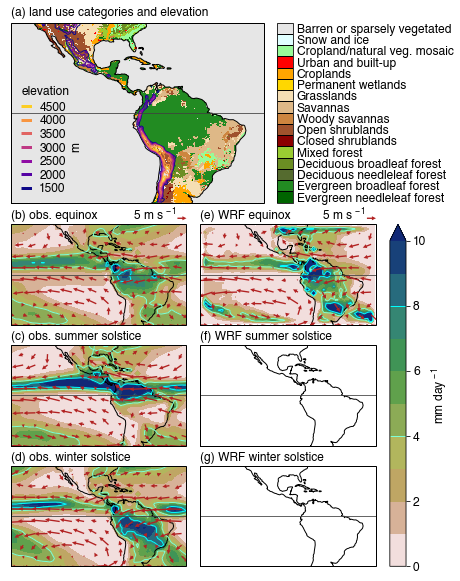

In [133]:
fontsize = 12

fig = mp.figure(figsize=(7.5,10))

gs1 = matplotlib.gridspec.GridSpec(1,7)
ax1 = mp.subplot(gs1[0:5], projection=cartopy.crs.PlateCarree())
gs1.update(bottom=0.63)

levels = numpy.arange(-20,21,5)
ax1.gridlines(ylocs=[0], color='0.25')
ax1.coastlines(resolution='110m')
ax1.set_extent([XLONG_M.min()+23., XLONG_M.max()-2, XLAT_M.min(), XLAT_M.max()], crs=cartopy.crs.PlateCarree())

land_use_map = ax1.pcolormesh(XLONG_M,XLAT_M,lu_index,cmap=categorical_cmap,vmin=1,vmax=17)
levels=numpy.arange(1500,4501,500)
contour_orog = ax1.contour(XLONG_M,XLAT_M,HGT_M,levels=levels,cmap=cmap_orog,linewidths=1,extend='both')#,alpha=0.75)

bbox_ax = ax1.get_position()

ax1.text(s='(a) land use categories and elevation', x=0, y=1.02, \
         fontsize=fontsize, ha='left', va='bottom', transform=ax1.transAxes)

every_nth_lat=20
every_nth_lon=20
quiver_scale = 0.75 # 0.05 for 850-600, 0.1 for below 850
quiver_shaft_width = 1.#.75
quiver_key_scale = 5
quiver_color = 'firebrick'
quiver_head_length = 3
quiver_head_axis_length = quiver_head_length

#line_colors = ['firebrick','orange']
line_colors = ['aquamarine','aqua']

gs2 = matplotlib.gridspec.GridSpec(3,9)
gs2.update(top=0.6)

levels=numpy.arange(0,11,1)

ax2 = mp.subplot(gs2[0,0:4], projection=cartopy.crs.PlateCarree())
ax2.gridlines(ylocs=[0], color='0.25')
ax2.coastlines(resolution='110m', lw=1)
ax2.set_extent([XLONG_M.min(), XLONG_M.max(), XLAT_M.min(), XLAT_M.max()], crs=cartopy.crs.PlateCarree())
contour_plot1 = ax2.contourf(lon_gpcp, lat_gpcp, gpcp_FMAASO_mean, levels=levels, cmap=cmap_precip, extend='max')
contour_lines1 = ax2.contour(lon_gpcp, lat_gpcp, gpcp_FMAASO_mean, levels=[4,8], colors=line_colors, linewidths=[1])
ax2.text(s='(b) obs. equinox', x=0, y=1.02, transform=ax2.transAxes, ha='left', va='bottom', fontsize=fontsize)
quiver_plot1 = ax2.quiver(XLONG_M[::every_nth_lat,::every_nth_lon], \
                        XLAT_M[::every_nth_lat,::every_nth_lon], \
                        uu850_mean_FMAASO[::every_nth_lat,::every_nth_lon], \
                        vv850_mean_FMAASO[::every_nth_lat,::every_nth_lon], \
                        units='xy', scale=quiver_scale, width=quiver_shaft_width, \
                        color=quiver_color, headlength=quiver_head_length, \
                        headaxislength=quiver_head_axis_length, \
                        zorder=2)    

ax4 = mp.subplot(gs2[1,0:4], projection=cartopy.crs.PlateCarree())
ax4.gridlines(ylocs=[0], color='0.25')
ax4.coastlines(resolution='110m')
ax4.set_extent([XLONG_M.min(), XLONG_M.max(), XLAT_M.min(), XLAT_M.max()], crs=cartopy.crs.PlateCarree())
contour_plot2 = ax4.contourf(lon_gpcp, lat_gpcp, gpcp_MJJ_mean, levels=levels, cmap=cmap_precip, extend='max')
contour_lines2 = ax4.contour(lon_gpcp, lat_gpcp, gpcp_MJJ_mean, levels=[4,8], colors=line_colors, linewidths=[1])
ax4.text(s='(c) obs. summer solstice', x=0, y=1.02, transform=ax4.transAxes, ha='left', va='bottom', fontsize=fontsize)
quiver_plot2 = ax4.quiver(XLONG_M[::every_nth_lat,::every_nth_lon], \
                        XLAT_M[::every_nth_lat,::every_nth_lon], \
                        uu850_mean_MJJ[::every_nth_lat,::every_nth_lon], \
                        vv850_mean_MJJ[::every_nth_lat,::every_nth_lon], \
                        units='xy', scale=quiver_scale, width=quiver_shaft_width, \
                        color=quiver_color, headlength=quiver_head_length, \
                        headaxislength=quiver_head_axis_length, \
                        zorder=2) 

ax6 = mp.subplot(gs2[2,0:4], projection=cartopy.crs.PlateCarree())
ax6.gridlines(ylocs=[0], color='0.25')
ax6.coastlines(resolution='110m')
ax6.set_extent([XLONG_M.min(), XLONG_M.max(), XLAT_M.min(), XLAT_M.max()], crs=cartopy.crs.PlateCarree())
contour_plot3 = ax6.contourf(lon_gpcp, lat_gpcp, gpcp_NDJ_mean, levels=levels, cmap=cmap_precip, extend='max')
contour_lines3 = ax6.contour(lon_gpcp, lat_gpcp, gpcp_NDJ_mean, levels=[4,8], colors=line_colors, linewidths=[1])
ax6.text(s='(d) obs. winter solstice', x=0, y=1.02, transform=ax6.transAxes, ha='left', va='bottom', fontsize=fontsize)
quiver_plot3 = ax6.quiver(XLONG_M[::every_nth_lat,::every_nth_lon], \
                        XLAT_M[::every_nth_lat,::every_nth_lon], \
                        uu850_mean_NDJ[::every_nth_lat,::every_nth_lon], \
                        vv850_mean_NDJ[::every_nth_lat,::every_nth_lon], \
                        units='xy', scale=quiver_scale, width=quiver_shaft_width, \
                        color=quiver_color, headlength=quiver_head_length, \
                        headaxislength=quiver_head_axis_length, \
                        zorder=2) 

# # ==================================================
# lons,lats = numpy.meshgrid(XLONG_M[0,:],XLAT_M[:,0])
# field = raintot_400_clim
# xi_smooth = scipy.ndimage.zoom(lons,0.5)
# yi_smooth = scipy.ndimage.zoom(lats,0.5)
# field_smooth = scipy.ndimage.zoom(field,0.5)
# # ==================================================

ax3 = mp.subplot(gs2[0,4:8], projection=cartopy.crs.PlateCarree())
ax3.gridlines(ylocs=[0], color='0.25')
ax3.coastlines(resolution='110m', lw=1)
ax3.set_extent([XLONG_M.min(), XLONG_M.max(), XLAT_M.min(), XLAT_M.max()], crs=cartopy.crs.PlateCarree())
#contour_plot4 = ax3.contourf(XLONG_M, XLAT_M, raintot_400_clim, levels=levels, cmap=cmap_precip, extend='max')
contour_plot4 = ax3.contourf(lon_gpcp-180., lat_gpcp, raintot_400_clim_interp, levels=levels, cmap=cmap_precip, extend='max')
contour_lines4 = ax3.contour(lon_gpcp-180., lat_gpcp, raintot_400_clim_interp, levels=[4,8], colors=line_colors, linewidths=[1])
ax3.text(s='(e) WRF equinox', x=0, y=1.02, transform=ax3.transAxes, ha='left', va='bottom', fontsize=fontsize)
quiver_plot4 = ax3.quiver(XLONG_M[::every_nth_lat,::every_nth_lon], \
                        XLAT_M[::every_nth_lat,::every_nth_lon], \
                        u_400_850mb_clim[::every_nth_lat,::every_nth_lon], \
                        v_400_850mb_clim[::every_nth_lat,::every_nth_lon], \
                        units='xy', scale=quiver_scale, width=quiver_shaft_width, \
                        color=quiver_color, headlength=quiver_head_length, \
                        headaxislength=quiver_head_axis_length, \
                        zorder=2)
# contour_lines4 = ax3.contour(xi_smooth, yi_smooth, field_smooth, \
#                              levels=[4], colors=['orange'], linewidths=[1])

ax5 = mp.subplot(gs2[1,4:8], projection=cartopy.crs.PlateCarree())
ax5.gridlines(ylocs=[0], color='0.25')
ax5.coastlines(resolution='110m')
ax5.set_extent([XLONG_M.min(), XLONG_M.max(), XLAT_M.min(), XLAT_M.max()], crs=cartopy.crs.PlateCarree())
#contour_plot5 = ax5.contourf(lon_gpcp, lat_gpcp, gpcp_MJJ_mean, levels=levels, cmap=cmap_precip, extend='max')
#contour_lines2 = ax5.contour(lon_gpcp, lat_gpcp, gpcp_MJJ_mean, levels=[4,8], colors=['firebrick'], linewidths=[2])
ax5.text(s='(f) WRF summer solstice', x=0, y=1.02, transform=ax5.transAxes, ha='left', va='bottom', fontsize=fontsize)

ax7 = mp.subplot(gs2[2,4:8], projection=cartopy.crs.PlateCarree())
ax7.gridlines(ylocs=[0], color='0.25')
ax7.coastlines(resolution='110m')
ax7.set_extent([XLONG_M.min(), XLONG_M.max(), XLAT_M.min(), XLAT_M.max()], crs=cartopy.crs.PlateCarree())
#contour_plot6 = ax7.contourf(lon_gpcp, lat_gpcp, gpcp_NDJ_mean, levels=levels, cmap=cmap_precip, extend='max')
#contour_lines3 = ax7.contour(lon_gpcp, lat_gpcp, gpcp_NDJ_mean, levels=[4,8], colors=['firebrick'], linewidths=[2])
ax7.text(s='(g) WRF winter solstice', x=0, y=1.02, transform=ax7.transAxes, ha='left', va='bottom', fontsize=fontsize)

ax_pos = ax1.get_position()
cbar_ax = fig.add_axes([ax_pos.x1-0.05,ax_pos.y0,0.03,ax_pos.height])
cbar = fig.colorbar(land_use_map, cax=cbar_ax, drawedges=True)
cbar.dividers.set_color('0')
cbar.dividers.set_linewidth(1)
cbar.set_ticks(numpy.arange(1.5,16.6,1))
cbar.set_ticklabels(type_name)
cbar.ax.tick_params(labelsize=fontsize, length=0)

cbar_orog_ax = fig.add_axes([ax_pos.x0+0.025,ax_pos.y0+0.015,0.02,ax_pos.height*0.5])
cbar_orog = fig.colorbar(contour_orog, cax=cbar_orog_ax)
cbar_orog_ax.tick_params(labelsize=fontsize)#, length=0)
cbar_orog.set_label('m', fontsize=fontsize)
#cbar_orog_ax.get_children().set_linewidths([2]*7)
cbar_orog_ax.text(s='elevation', x=0, y=1.05, ha='left', va='bottom', \
                  transform=cbar_orog_ax.transAxes, fontsize=fontsize)
cbar_orog.outline.set_visible(False)
cbar_orog_ax.tick_params(axis='y', which='both', right='off')
cbar_orog_ax.get_children()[0].set_linewidths(3)
cbar_orog_ax.get_children()[3].set_facecolor('None')#('None')

#cbar_orog_ax.add_patch(matplotlib.patches.Rectangle((-0.25,-0.1),1.25,1.1,color='0',alpha=0.25))
#ax1.add_patch(matplotlib.patches.Rectangle((0,0),0.2,0.6,color='red',zorder=10))

ax_top = ax3.get_position()
ax_bottom = ax7.get_position()
cbar_ax = fig.add_axes([ax_top.x1+0.02,ax_bottom.y0,0.03,ax_top.y1-ax_bottom.y0])
cbar = mp.colorbar(contour_plot1, cax=cbar_ax, orientation='vertical')
cbar.ax.tick_params(labelsize=fontsize)
cbar.set_label('mm day$^{\,-1}$', fontsize=fontsize)
cbar.add_lines(contour_lines3)

gs1.update(left=ax1.get_position().x0-0.053)

quiver_key = ax2.quiverkey(quiver_plot1, X=1.0, Y=1.06, labelpos='E', label='', \
                                  U=quiver_key_scale, coordinates='axes')
quiver_key = ax3.quiverkey(quiver_plot4, X=1.0, Y=1.06, labelpos='E', label='', \
                                  U=quiver_key_scale, coordinates='axes')
quiver_key_text = ax2.text(s=str(quiver_key_scale)+' m s$^{\,-1}$', x=0.94, y=1.006, \
                                  transform=ax2.transAxes, fontsize=fontsize, ha='right', va='bottom')
quiver_key_text = ax3.text(s=str(quiver_key_scale)+' m s$^{\,-1}$', x=0.94, y=1.006, \
                                  transform=ax3.transAxes, fontsize=fontsize, ha='right', va='bottom')

mp.savefig('figure1_land_use_precipitation_winds.png', dpi=300, bbox_inches='tight', transparent=True)

In [70]:
cbar_orog_ax.get_children()

 Text(0,1.1,'altitude'),
 Text(0.5,1,''),
 Text(0,1,''),
 Text(1,1,''),